In [1]:
import numpy as np
import pandas as pd
import plotly.express as px
from sklearn.model_selection import train_test_split
import tensorflow as tf

2022-06-23 15:26:43.205170: W tensorflow/stream_executor/platform/default/dso_loader.cc:64] Could not load dynamic library 'libcudart.so.11.0'; dlerror: libcudart.so.11.0: cannot open shared object file: No such file or directory
2022-06-23 15:26:43.205216: I tensorflow/stream_executor/cuda/cudart_stub.cc:29] Ignore above cudart dlerror if you do not have a GPU set up on your machine.


In [55]:
df = pd.read_csv('../data/real_dataset.csv').sample(frac=0.009)
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1300 entries, 32727 to 58653
Data columns (total 26 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   playlist             1300 non-null   object 
 1   danceability         1300 non-null   float64
 2   energy               1300 non-null   float64
 3   key                  1300 non-null   float64
 4   loudness             1300 non-null   float64
 5   speechiness          1300 non-null   float64
 6   acousticness         1300 non-null   float64
 7   instrumentalness     1300 non-null   float64
 8   liveness             1300 non-null   float64
 9   valence              1300 non-null   float64
 10  tempo                1300 non-null   float64
 11  duration_ms          1300 non-null   float64
 12  time_signature       1300 non-null   float64
 13  danceability_pl      1300 non-null   float64
 14  energy_pl            1300 non-null   float64
 15  key_pl               1300 non-nul

In [56]:
try:
    y = pd.factorize(df['belongs'])[0]
    df.drop(['belongs', 'playlist'], axis=1, inplace=True)
    x_train, x_test, y_train, y_test = train_test_split(df, y, test_size=0.2)
except KeyError:
    x_train, x_test, y_train, y_test = train_test_split(df, y, test_size=0.2)

In [57]:
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
x_train_scaled = scaler.fit_transform(x_train)
x_test_scaled = scaler.transform(x_test)

In [58]:
model = tf.keras.Sequential()
model.add(tf.keras.Input(shape=(24,)))
# model.add(tf.keras.layers.Conv1D(12, 24, 1, input_shape = (None, 24), activation='relu'))
model.add(tf.keras.layers.Dense(20, activation='relu'))
model.add(tf.keras.layers.Dense(16, activation='relu'))
model.add(tf.keras.layers.Dense(12, activation='relu'))
model.add(tf.keras.layers.Dense(8, activation='relu'))
model.add(tf.keras.layers.Dense(4, activation='relu'))
model.add(tf.keras.layers.Dense(1, activation='sigmoid'))

'''
tf.keras.layers.Dropout(.2, input_shape=(24,))
model.add(tf.keras.layers.Dense(16, activation='relu'))
tf.keras.layers.Dropout(.2, input_shape=(16,))
model.add(tf.keras.layers.Dense(8, activation='relu'))
tf.keras.layers.Dropout(.2, input_shape=(8,))'''

model.compile(
    loss=tf.keras.losses.BinaryCrossentropy(from_logits=False),
    optimizer=tf.keras.optimizers.Adam(learning_rate=0.15),
    metrics=[
        tf.keras.metrics.BinaryAccuracy(name='accuracy'),
        tf.keras.metrics.Precision(name='precision'),
        tf.keras.metrics.Recall(name='recall')
    ]
)

In [59]:
model.fit(x_train_scaled, y_train, epochs=1, batch_size=1)

   1/1040 [..............................] - ETA: 23:37 - loss: 0.6670 - accuracy: 1.0000 - precision: 0.0000e+00 - recall: 0.0000e+00

  18/1040 [..............................] - ETA: 3s - loss: 1.3729 - accuracy: 0.5556 - precision: 0.3333 - recall: 0.1429           

  34/1040 [..............................] - ETA: 3s - loss: 1.6778 - accuracy: 0.5294 - precision: 0.3846 - recall: 0.3846

  48/1040 [>.............................] - ETA: 3s - loss: 1.4003 - accuracy: 0.5208 - precision: 0.4444 - recall: 0.6000

  64/1040 [>.............................] - ETA: 3s - loss: 1.2162 - accuracy: 0.5625 - precision: 0.5349 - recall: 0.7419

  75/1040 [=>............................] - ETA: 3s - loss: 1.1447 - accuracy: 0.5467 - precision: 0.5185 - recall: 0.7778

  87/1040 [=>............................] - ETA: 3s - loss: 1.0832 - accuracy: 0.5402 - precision: 0.5152 - recall: 0.8095

 102/1040 [=>............................] - ETA: 3s - loss: 1.0236 - accuracy: 0.5490 - precision: 0.5068 - recall: 0.7872

 119/1040 [==>...........................] - ETA: 3s - loss: 0.9832 - accuracy: 0.5378 - precision: 0.5068 - recall: 0.6607

 136/1040 [==>...........................] - ETA: 3s - loss: 0.9475 - accuracy: 0.5368 - precision: 0.5263 - recall: 0.5970

 153/1040 [===>..........................] - ETA: 3s - loss: 0.9194 - accuracy: 0.5490 - precision: 0.5484 - recall: 0.6538

 172/1040 [===>..........................] - ETA: 2s - loss: 0.8997 - accuracy: 0.5523 - precision: 0.5536 - recall: 0.6966

 191/1040 [====>.........................] - ETA: 2s - loss: 0.8826 - accuracy: 0.5393 - precision: 0.5344 - recall: 0.7216

 205/1040 [====>.........................] - ETA: 2s - loss: 0.8693 - accuracy: 0.5415 - precision: 0.5333 - recall: 0.6990

 221/1040 [=====>........................] - ETA: 2s - loss: 0.8537 - accuracy: 0.5520 - precision: 0.5333 - recall: 0.6667

 238/1040 [=====>........................] - ETA: 2s - loss: 0.8451 - accuracy: 0.5504 - precision: 0.5333 - recall: 0.6207

 256/1040 [======>.......................] - ETA: 2s - loss: 0.8319 - accuracy: 0.5625 - precision: 0.5333 - recall: 0.5950

 276/1040 [======>.......................] - ETA: 2s - loss: 0.8244 - accuracy: 0.5652 - precision: 0.5333 - recall: 0.5581

 288/1040 [=======>......................] - ETA: 2s - loss: 0.8213 - accuracy: 0.5590 - precision: 0.5333 - recall: 0.5294

 304/1040 [=======>......................] - ETA: 2s - loss: 0.8171 - accuracy: 0.5428 - precision: 0.5170 - recall: 0.5278

 322/1040 [========>.....................] - ETA: 2s - loss: 0.8091 - accuracy: 0.5497 - precision: 0.5333 - recall: 0.5641

 338/1040 [========>.....................] - ETA: 2s - loss: 0.8025 - accuracy: 0.5533 - precision: 0.5414 - recall: 0.5904

 355/1040 [=========>....................] - ETA: 2s - loss: 0.7958 - accuracy: 0.5577 - precision: 0.5505 - recall: 0.6158

 371/1040 [=========>....................] - ETA: 2s - loss: 0.7965 - accuracy: 0.5472 - precision: 0.5330 - recall: 0.6209

 387/1040 [==========>...................] - ETA: 2s - loss: 0.7907 - accuracy: 0.5504 - precision: 0.5330 - recall: 0.6011

 397/1040 [==========>...................] - ETA: 2s - loss: 0.7900 - accuracy: 0.5491 - precision: 0.5330 - recall: 0.5855

 412/1040 [==========>...................] - ETA: 2s - loss: 0.7883 - accuracy: 0.5461 - precision: 0.5330 - recall: 0.5622

 429/1040 [===========>..................] - ETA: 2s - loss: 0.7847 - accuracy: 0.5385 - precision: 0.5207 - recall: 0.5459

 439/1040 [===========>..................] - ETA: 2s - loss: 0.7824 - accuracy: 0.5399 - precision: 0.5207 - recall: 0.5355

 450/1040 [===========>..................] - ETA: 1s - loss: 0.7800 - accuracy: 0.5422 - precision: 0.5207 - recall: 0.5256

 464/1040 [============>.................] - ETA: 1s - loss: 0.7807 - accuracy: 0.5345 - precision: 0.5207 - recall: 0.5022

 482/1040 [============>.................] - ETA: 1s - loss: 0.7776 - accuracy: 0.5332 - precision: 0.5171 - recall: 0.5193

 501/1040 [=============>................] - ETA: 1s - loss: 0.7752 - accuracy: 0.5309 - precision: 0.5138 - recall: 0.5372

 515/1040 [=============>................] - ETA: 1s - loss: 0.7730 - accuracy: 0.5320 - precision: 0.5115 - recall: 0.5425

 530/1040 [==============>...............] - ETA: 1s - loss: 0.7714 - accuracy: 0.5302 - precision: 0.5115 - recall: 0.5255

 545/1040 [==============>...............] - ETA: 1s - loss: 0.7702 - accuracy: 0.5229 - precision: 0.5056 - recall: 0.5133

 564/1040 [===============>..............] - ETA: 1s - loss: 0.7680 - accuracy: 0.5177 - precision: 0.5018 - recall: 0.5128

 579/1040 [===============>..............] - ETA: 1s - loss: 0.7664 - accuracy: 0.5147 - precision: 0.4966 - recall: 0.5233

 592/1040 [================>.............] - ETA: 1s - loss: 0.7650 - accuracy: 0.5135 - precision: 0.4966 - recall: 0.5105

 601/1040 [================>.............] - ETA: 1s - loss: 0.7639 - accuracy: 0.5141 - precision: 0.4966 - recall: 0.5034

 606/1040 [================>.............] - ETA: 1s - loss: 0.7635 - accuracy: 0.5132 - precision: 0.4966 - recall: 0.4983

 608/1040 [================>.............] - ETA: 1s - loss: 0.7633 - accuracy: 0.5132 - precision: 0.4966 - recall: 0.4966

 617/1040 [================>.............] - ETA: 1s - loss: 0.7620 - accuracy: 0.5154 - precision: 0.4966 - recall: 0.4916

 632/1040 [=================>............] - ETA: 1s - loss: 0.7615 - accuracy: 0.5127 - precision: 0.4966 - recall: 0.4771

 642/1040 [=================>............] - ETA: 1s - loss: 0.7611 - accuracy: 0.5125 - precision: 0.4983 - recall: 0.4808

 661/1040 [==================>...........] - ETA: 1s - loss: 0.7594 - accuracy: 0.5144 - precision: 0.5031 - recall: 0.4985

 679/1040 [==================>...........] - ETA: 1s - loss: 0.7582 - accuracy: 0.5140 - precision: 0.5030 - recall: 0.5120

 698/1040 [===================>..........] - ETA: 1s - loss: 0.7561 - accuracy: 0.5158 - precision: 0.5014 - recall: 0.5103

 719/1040 [===================>..........] - ETA: 1s - loss: 0.7546 - accuracy: 0.5188 - precision: 0.5014 - recall: 0.4986

 738/1040 [====================>.........] - ETA: 1s - loss: 0.7553 - accuracy: 0.5136 - precision: 0.4986 - recall: 0.4860

 748/1040 [====================>.........] - ETA: 1s - loss: 0.7541 - accuracy: 0.5160 - precision: 0.5042 - recall: 0.4959

 759/1040 [====================>.........] - ETA: 0s - loss: 0.7532 - accuracy: 0.5178 - precision: 0.5081 - recall: 0.5054

 771/1040 [=====================>........] - ETA: 0s - loss: 0.7542 - accuracy: 0.5162 - precision: 0.5052 - recall: 0.5119

 791/1040 [=====================>........] - ETA: 0s - loss: 0.7532 - accuracy: 0.5158 - precision: 0.5026 - recall: 0.5039

 812/1040 [======================>.......] - ETA: 0s - loss: 0.7520 - accuracy: 0.5160 - precision: 0.5026 - recall: 0.4911

 831/1040 [======================>.......] - ETA: 0s - loss: 0.7507 - accuracy: 0.5150 - precision: 0.5013 - recall: 0.4876

 852/1040 [=======================>......] - ETA: 0s - loss: 0.7489 - accuracy: 0.5153 - precision: 0.4975 - recall: 0.4793

 871/1040 [========================>.....] - ETA: 0s - loss: 0.7478 - accuracy: 0.5178 - precision: 0.4975 - recall: 0.4713

 889/1040 [========================>.....] - ETA: 0s - loss: 0.7466 - accuracy: 0.5197 - precision: 0.4975 - recall: 0.4635

 908/1040 [=========================>....] - ETA: 0s - loss: 0.7469 - accuracy: 0.5187 - precision: 0.4975 - recall: 0.4529

 927/1040 [=========================>....] - ETA: 0s - loss: 0.7463 - accuracy: 0.5135 - precision: 0.4891 - recall: 0.4548

 936/1040 [==========================>...] - ETA: 0s - loss: 0.7459 - accuracy: 0.5128 - precision: 0.4891 - recall: 0.4497

 948/1040 [==========================>...] - ETA: 0s - loss: 0.7455 - accuracy: 0.5084 - precision: 0.4845 - recall: 0.4481

 963/1040 [==========================>...] - ETA: 0s - loss: 0.7450 - accuracy: 0.5088 - precision: 0.4849 - recall: 0.4543

 980/1040 [===========================>..] - ETA: 0s - loss: 0.7443 - accuracy: 0.5092 - precision: 0.4849 - recall: 0.4466

 996/1040 [===========================>..] - ETA: 0s - loss: 0.7439 - accuracy: 0.5070 - precision: 0.4849 - recall: 0.4372

1012/1040 [============================>.] - ETA: 0s - loss: 0.7435 - accuracy: 0.5010 - precision: 0.4774 - recall: 0.4351

1031/1040 [============================>.] - ETA: 0s - loss: 0.7423 - accuracy: 0.5015 - precision: 0.4743 - recall: 0.4318

1040/1040 [==============================] - 5s 3ms/step - loss: 0.7426 - accuracy: 0.5000 - precision: 0.4743 - recall: 0.4266


In [60]:
test_predictions = model.predict_on_batch(x_test_scaled)
#test_predictions = test_predictions.flatten()
# print(test_predictions)
prediction_classes = [
    1 if prob > 0.5 else 0 for prob in np.ravel(test_predictions)
]
print(prediction_classes[:50])

[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0]


2022-06-23 18:07:54.450355: W tensorflow/core/data/root_dataset.cc:247] Optimization loop failed: CANCELLED: Operation was cancelled


In [61]:
from sklearn.metrics import accuracy_score

def precision_recall_score(pred, true):
    tp = 0
    fp = 0
    fn = 0
    for (p, t) in zip(pred, true):
        if t == 0:
            if p == 0:
                tp += 1
            else:
                fn += 1
        else:
            if p == 0:
                fp += 1
    return tp/(tp+fp), tp/(tp+fn)

accuracy = accuracy_score(prediction_classes, y_test)
precision, recall = precision_recall_score(prediction_classes, y_test)
f1 = (precision*recall)/(precision+recall)

print(f'Accuracy: {accuracy}\nPrecision: {precision}\nRecall: {recall}\nF1: {f1}')

Accuracy: 0.49615384615384617
Precision: 0.49615384615384617
Recall: 1.0
F1: 0.33161953727506427


In [62]:
import seaborn as sns
def tp_fp_tn_fn (pred, true):
    tp = 0
    fp = 0
    tn = 0
    fn = 0
    for (p, t) in zip (pred, true):
        if t == 0:
            if p == 0:
                tp += 1
            else:
                fn += 1
        else:
            if p == 0:
                fp += 1
            else:
                tn += 1
    return tp, fp, tn, fn

tp, fp, tn, fn = tp_fp_tn_fn (prediction_classes, y_test)
print (tp, fp, tn, fn)


129 131 0 0


[[129   0]
 [131   0]]


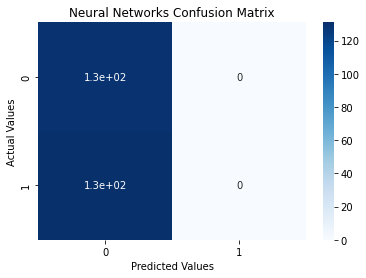

In [65]:
from sklearn.metrics import confusion_matrix

cf_matrix = confusion_matrix(y_test, prediction_classes)

print(cf_matrix)

ax = sns.heatmap(cf_matrix, annot=True, cmap='Blues')
ax.set_title('Neural Networks Confusion Matrix');
ax.set_xlabel('Predicted Values')
ax.set_ylabel('Actual Values');
tmp = ax.get_figure()
tmp.savefig("../omni/app/static/images/conf_mat_nn.png")